In [1]:
## This is a simple stock market forcasting using linear regression. 

In [2]:
import pandas as pd
import numpy as np
import datetime
import pandas_datareader.data as web

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, cross_validation, svm

/usr/local/Cellar/python3/3.5.2_3/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
#df = quandl.get("WIKI/CAR")


In [4]:
start = datetime.datetime(2000,1,1)
end = datetime.date.today()

stock = web.DataReader("AMD", "morningstar")
stock.tail()


Close   High    Low   Open    Volume
Symbol Date                                            
AMD    2018-07-03  15.00  15.34  14.96  15.21  32094031
       2018-07-04  15.00  15.00  15.00  15.00         0
       2018-07-05  15.50  15.50  15.02  15.13  40703271
       2018-07-06  16.36  16.39  15.48  15.52  65101671
       2018-07-09  16.61  16.84  16.17  16.73  58283840

In [5]:
df = stock[['Close']]
#df = df[df.columns[0]]
#print(df['close_price'])

In [6]:
forecast_out = int(30)

In [7]:
df['Prediction'] = df[['Close']].shift(-forecast_out) #  label column with data shifted 30 units up
df.tail()
len(df['Close'])

/usr/local/Cellar/python3/3.5.2_3/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


2222

In [8]:
#X = np.array(df.drop(['Prediction'], 1))
X = np.array(df.drop(['Prediction'], 1))

print(X)

[[ 9.68]
 [ 9.7 ]
 [ 9.71]
 ...
 [15.5 ]
 [16.36]
 [16.61]]


In [9]:
X = preprocessing.scale(X)
len(X)

2222

In [10]:
X_forecast = X[-forecast_out:] # set X_forecast equal to last 30
X = X[:-forecast_out] # remove last 30 from X

print(X[:10])
print(X_forecast[:10])
len(X)

[[0.9343179 ]
 [0.93982922]
 [0.94258489]
 [0.90400559]
 [0.87644895]
 [0.86542629]
 [0.78551203]
 [0.65048448]
 [0.78826769]
 [0.74693273]]
[[1.94840234]
 [2.07516289]
 [2.05036191]
 [2.23499142]
 [2.35899631]
 [2.35899631]
 [2.58496078]
 [2.37001897]
 [2.46922288]
 [2.60149476]]


2192

In [11]:
y = np.array(df['Prediction'])
one = len(y)
y = y[:-forecast_out]
two = len(y)
print(one)
print(two)
print(y)

2222
2192
[ 7.87  7.87  8.06 ... 15.5  16.36 16.61]


In [12]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)


In [13]:
# Training
clf = LinearRegression()
clf.fit(X_train,y_train)
# Testing
confidence = clf.score(X_test, y_test)
print("confidence: ", confidence)

confidence:  0.884000504752073


/usr/local/Cellar/python3/3.5.2_3/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [14]:
forecast_prediction = clf.predict(X_forecast)
print(forecast_prediction)

[13.30711211 13.75778073 13.66960643 14.32601508 14.76688656 14.76688656
 15.57025237 14.80607514 15.15877232 15.62903523 15.74660096 16.20706672
 16.13848672 16.22666101 16.9810411  16.56956105 16.4030096  15.55065808
 15.69761524 15.0216123  15.40370092 14.88445229 15.21755518 14.90404658
 15.07059802 14.91384372 14.91384372 15.40370092 16.2462553  16.4911839 ]


In [15]:
import matplotlib.pyplot as plt


In [16]:
plt.plot(forecast_prediction)

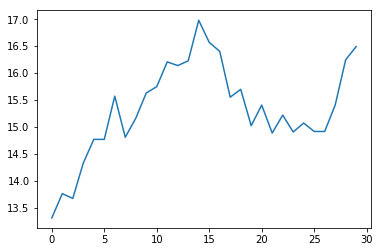

In [17]:
plt.show()